In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
df = pd.read_csv('data/sale_training.csv', usecols = ['SALE PRICE','SALE DATE', 'histdist', 'landmark', 'landuse', 'YEAR BUILT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements', 'lotarea',
       'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'assessland', 'assesstot', 'exemptland',
       'exempttot', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'DensityPop', 'IncomePerCap', 'Poverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Employed', 'Unemployment',
       'distance_subway', 'distance_bus', 'park_num', 'park_area',
       'park_top_level', 'park_distance', 'FELONY', 'VIOLATION', 'MISDEMEANOR',
       'Num of SAT Test Takers', 'satReadingSum', 'satMathSum',
       'satWritingSum'])
print(df.shape)
df.head()

(8890, 61)


,SALE PRICE,SALE DATE,histdist,landmark,landuse,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,...,park_area,park_top_level,park_distance,FELONY,VIOLATION,MISDEMEANOR,Num of SAT Test Takers,satReadingSum,satMathSum,satWritingSum
0,3750000,2018-08-01 00:00:00,Mount Morris Park Historic District,NaN,2.0,110.0,3.0,0.0,3.0,2018.0,...,22.051,2.0,0.001133,462.0,195.0,869.0,3825.0,498.0,525.0,496.0
1,5000000,2018-10-25 00:00:00,NaN,NaN,4.0,119.0,26.0,4.0,30.0,5060.0,...,179.671,2.0,0.001841,306.0,156.0,677.0,4005.0,441.0,487.0,442.0
2,5000000,2018-10-25 00:00:00,NaN,NaN,4.0,119.0,26.0,4.0,30.0,5060.0,...,179.671,2.0,0.001792,303.0,156.0,672.0,4005.0,441.0,487.0,442.0
3,29100000,2018-10-22 00:00:00,NaN,NaN,4.0,99.0,26.0,1.0,27.0,4642.0,...,843.074,3.0,0.000745,509.0,266.0,897.0,3825.0,498.0,525.0,496.0
4,2350000,2019-02-11 00:00:00,Upper East Side Historic District,NaN,3.0,116.0,0.0,0.0,0.0,0.0,...,844.633,3.0,0.001081,102.0,21.0,83.0,9100.0,451.0,476.0,447.0


# Preprocessing

## Inspection

In [3]:
sale_price = sorted(df['SALE PRICE'])

(array([8.692e+03, 9.000e+01, 2.100e+01, 1.200e+01, 2.000e+01, 2.000e+00,
        3.000e+00, 7.000e+00, 1.400e+01, 5.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 4.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 1.96000010e+07, 3.92000010e+07, 5.88000009e+07,
        7.84000009e+07, 9.80000009e+07, 1.17600001e+08, 1.37200001e+08,
        1.56800001e+08, 1.76400001e+08, 1.96000001e+08, 2.15600001e+08,
        2.35200001e+08, 2.54800001e+08, 2.74400001e+08, 2.94000001e+08,
        3.13600001e+08, 3.33200001e+08, 3.52800001e+08, 3.72400001e+08,
        3.920000

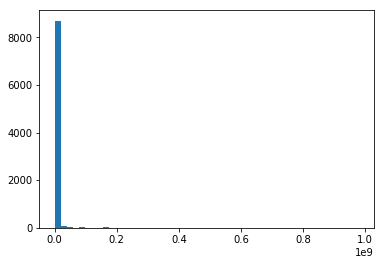

In [4]:
plt.hist(sale_price, bins=50)

### Extremum filter

https://en.wikipedia.org/wiki/List_of_probability_distributions  
out of 2 std: 95.45%  
out of 3 std: 99.73%  


In [5]:
import statistics

In [6]:
# https://stackoverflow.com/questions/24101524/finding-median-of-list-in-python
median = statistics.median(sale_price)
median

825000.0

(array([ 60.,   4.,  17.,   4.,  11.,   4.,   6.,  18.,  13.,  13.,   9.,
         14.,  11.,  21.,   1.,  36.,   6.,  11.,  10.,  22.,   0.,   5.,
          6.,   2.,   4.,   3.,   6.,   8.,   2.,   1.,  15.,   8.,  25.,
         31.,  11.,  22.,  48.,  26.,  29.,  50.,  18.,  49.,  70.,  64.,
         34.,  36.,  56.,  85.,  71.,  60.,  60.,  63.,  52.,  50.,  52.,
         45.,  56.,  50.,  45.,  51.,  66.,  84.,  57.,  95.,  58.,  66.,
         78.,  40.,  52.,  92., 106.,  55.,  90.,  82.,  35.,  77.,  53.,
         62., 101.,  64.,  39., 100.,  51.,  70.,  91.,  39.,  96.,  98.,
         70.,  85., 105.,  67.,  49.,  73.,  33.,  63., 113.,  16.,  56.,
         58.]),
 array([1.0000000e+00, 8.2509900e+03, 1.6500980e+04, 2.4750970e+04,
        3.3000960e+04, 4.1250950e+04, 4.9500940e+04, 5.7750930e+04,
        6.6000920e+04, 7.4250910e+04, 8.2500900e+04, 9.0750890e+04,
        9.9000880e+04, 1.0725087e+05, 1.1550086e+05, 1.2375085e+05,
        1.3200084e+05, 1.4025083e+05, 1.485008

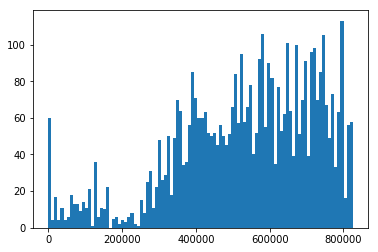

In [7]:
# left
percent = 0.5
sale_price_percent = sale_price[0:int(len(sale_price)*(1-percent))]
plt.hist(sale_price_percent, bins=100)


In [8]:
percent_right = 0.9973
percent_right = 0.9545
percent_left = len(list(filter(lambda x: x<200000, sale_price)))/len(sale_price)
percent_left

0.03419572553430821

(array([132., 484., 661., 764., 773., 902., 612., 393., 440., 244., 250.,
        187., 189., 159., 153., 145.,  94.,  98.,  77.,  90.,  63.,  70.,
         52.,  81.,  59.,  35.,  47.,  35.,  52.,  39.,  34.,  22.,  35.,
         20.,  24.,  24.,  20.,  19.,  24.,  23.,  24.,  17.,  19.,  27.,
          9.,  12.,  12.,   9.,  13.,   4.,   6.,  20.,   9.,  14.,  15.,
         10.,  14.,   7.,   5.,  10.,   4.,  10.,  15.,   7.,  16.,   7.,
          1.,  11.,   9.,  10.,  13.,   5.,  21.,   5.,   9.,   3.,   9.,
          9.,   5.,   2.,  10.,   4.,   8.,  10.,   4.,   4.,   7.,   5.,
          8.,   5.,   7.,   4.,   6.,   9.,   3.,   4.,   8.,   4.,  13.,
          6.]),
 array([ 200000.,  294000.,  388000.,  482000.,  576000.,  670000.,
         764000.,  858000.,  952000., 1046000., 1140000., 1234000.,
        1328000., 1422000., 1516000., 1610000., 1704000., 1798000.,
        1892000., 1986000., 2080000., 2174000., 2268000., 2362000.,
        2456000., 2550000., 2644000., 2738000.

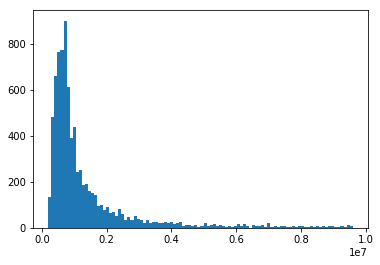

In [9]:
sale_price_percent = sale_price[int(len(sale_price) * percent_left):int(len(sale_price) * percent_right)] 
plt.hist(sale_price_percent, bins=100)

(array([  4.,   6.,   4.,   8.,   1.,  12.,  11.,  26.,  32.,  29.,  52.,
         37.,  67.,  56., 102.,  77.,  89., 155.,  96., 125., 106.,  96.,
        116., 157., 191., 153., 135., 256., 186., 173., 217., 237., 242.,
        265., 283., 222., 179., 182., 174., 109., 181., 215., 131.,  65.,
        149., 128., 118., 106.,  83., 144.,  74.,  83., 101.,  98., 102.,
         79.,  85.,  70.,  69.,  70.,  60.,  67.,  51.,  47.,  77.,  60.,
         49.,  40.,  50.,  59.,  35.,  23.,  54.,  38.,  26.,  25.,  40.,
         32.,  38.,  31.,  23.,  13.,  20.,  29.,  29.,  26.,  18.,  19.,
         27.,  25.,  21.,  38.,  18.,  23.,  16.,  25.,  20.,  18.,  21.,
         31.]),
 array([12.20607265, 12.24478466, 12.28349667, 12.32220868, 12.36092069,
        12.3996327 , 12.43834471, 12.47705672, 12.51576873, 12.55448074,
        12.59319275, 12.63190476, 12.67061677, 12.70932878, 12.74804079,
        12.7867528 , 12.82546481, 12.86417682, 12.90288883, 12.94160084,
        12.98031285, 13.01

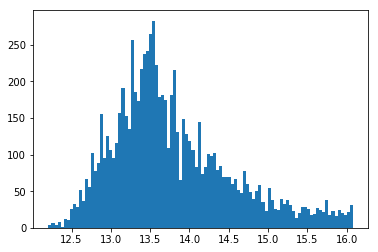

In [10]:
sale_price_percent_log = np.log(sale_price_percent)
plt.hist(sale_price_percent_log, bins=100)

(array([  4.,   6.,   4.,   8.,   1.,  12.,  11.,  26.,  32.,  29.,  52.,
         37.,  67.,  56., 102.,  77.,  89., 155.,  96., 125., 106.,  96.,
        116., 157., 191., 153., 135., 256., 186., 173., 217., 237., 242.,
        265., 283., 222., 179., 182., 174., 109., 181., 215., 131.,  65.,
        149., 128., 118., 106.,  83., 144.,  74.,  83., 101.,  98., 102.,
         79.,  85.,  70.,  69.,  70.,  60.,  67.,  51.,  47.,  77.,  60.,
         49.,  40.,  50.,  59.,  35.,  23.,  54.,  38.,  26.,  25.,  40.,
         32.,  38.,  31.,  23.,  13.,  20.,  29.,  29.,  26.,  18.,  19.,
         27.,  25.,  21.,  38.,  18.,  23.,  16.,  25.,  20.,  18.,  21.,
         31.]),
 array([5.30103   , 5.31784241, 5.33465482, 5.35146723, 5.36827965,
        5.38509206, 5.40190447, 5.41871688, 5.43552929, 5.45234171,
        5.46915412, 5.48596653, 5.50277894, 5.51959136, 5.53640377,
        5.55321618, 5.57002859, 5.58684101, 5.60365342, 5.62046583,
        5.63727824, 5.65409066, 5.67090307, 5.

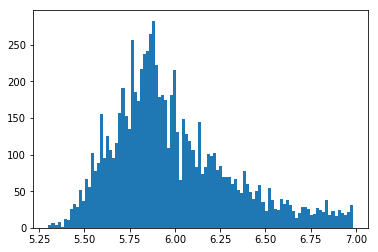

In [11]:
sale_price_percent_log = np.log10(sale_price_percent)
plt.hist(sale_price_percent_log, bins=100)

In [12]:
def standardize(df):
    return (df-df.mean())/df.std()

In [13]:
sale_price_percent_standardize = standardize(pd.DataFrame(sale_price_percent))

(array([132., 484., 661., 764., 773., 902., 612., 393., 440., 244., 250.,
        187., 189., 159., 153., 145.,  94.,  98.,  77.,  90.,  63.,  70.,
         52.,  81.,  59.,  35.,  47.,  35.,  52.,  39.,  34.,  22.,  35.,
         20.,  24.,  24.,  20.,  19.,  24.,  23.,  24.,  17.,  19.,  27.,
          9.,  12.,  12.,   9.,  13.,   4.,   6.,  20.,   9.,  14.,  15.,
         10.,  14.,   7.,   5.,  10.,   4.,  10.,  15.,   7.,  16.,   7.,
          1.,  11.,   9.,  10.,  13.,   5.,  21.,   5.,   9.,   3.,   9.,
          9.,   5.,   2.,  10.,   4.,   8.,  10.,   4.,   4.,   7.,   5.,
          8.,   5.,   7.,   4.,   6.,   9.,   3.,   4.,   8.,   4.,  13.,
          6.]),
 array([-0.76962276, -0.7091282 , -0.64863365, -0.58813909, -0.52764453,
        -0.46714998, -0.40665542, -0.34616087, -0.28566631, -0.22517175,
        -0.1646772 , -0.10418264, -0.04368808,  0.01680647,  0.07730103,
         0.13779559,  0.19829014,  0.2587847 ,  0.31927926,  0.37977381,
         0.44026837,  0.50

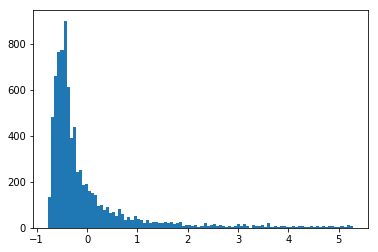

In [14]:
plt.hist(sale_price_percent_standardize[0], bins=100)

## Gaussian distribution Test


**setting a significance threshold : alpha = 0.05**

In [15]:
alpha = 0.05

**declaring the null hypothesis**  
Null Hypothesis: the vairiable sample for the feature is drawn from a Gaussian distribution, p-value 0.05

### testing

**Note** this can be answered with a KS test, in which case the data has to be standardized, or with an Anderson Darling test.
### KS test

In [16]:
import scipy as sp
from scipy import stats

In [17]:
p = sp.stats.kstest((sale_price_percent - np.mean(sale_price_percent))/
                np.std(sale_price_percent), "norm")[1]
print(p)
if p > alpha:
    print("the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected")
else: 
    print("we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of", alpha)

0.0
we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of 0.05


In [18]:
p = sp.stats.kstest((sale_price_percent_log - np.mean(sale_price_percent_log))/
                np.std(sale_price_percent_log), "norm")[1]
print(p)
if p > alpha:
    print("the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected")
else: 
    print("we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of", alpha)

4.931562418502016e-80
we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of 0.05


### AD test

In [19]:
ad = sp.stats.anderson(sale_price_percent, "norm")
if ad[0] < ad[1][ad[2] == int(alpha * 100)]:
     print("the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected")
else: 
    print("we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of", alpha)


we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of 0.05


In [20]:
ad = sp.stats.anderson(sale_price_percent_log, "norm")
if ad[0] < ad[1][ad[2] == int(alpha * 100)]:
     print("the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected")
else: 
    print("we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of", alpha)


we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of 0.05


### other test

In [21]:
sp.stats.gamma(sale_price_percent)

In [22]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.chisquare.html
sp.stats.chisquare(sale_price_percent)

Power_divergenceResult(statistic=14149032436.588583, pvalue=0.0)

In [23]:
sp.stats.chisquare(sale_price_percent_log)

Power_divergenceResult(statistic=151.97065630836238, pvalue=1.0)

## Cleaning

### Extremum filter

In [24]:
sale_price = sorted(df['SALE PRICE'])

In [25]:
# percent_right = 0.9973 # 3 std
percent_right = 0.9545 # 2 std
percent_left = len(list(filter(lambda x: x<200000, sale_price)))/len(sale_price)
percent_left

0.03419572553430821

In [26]:
price_left = sale_price[int(len(sale_price) * percent_left)]
price_right = sale_price[int(len(sale_price) * percent_right)]

In [27]:
# fillna
df = df.fillna(0)
df = df[(df['SALE PRICE'] > price_left) \
         & (df['SALE PRICE'] < price_right)]
print(df.shape)
df.head()

(8177, 61)


,SALE PRICE,SALE DATE,histdist,landmark,landuse,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,...,park_area,park_top_level,park_distance,FELONY,VIOLATION,MISDEMEANOR,Num of SAT Test Takers,satReadingSum,satMathSum,satWritingSum
0,3750000,2018-08-01 00:00:00,Mount Morris Park Historic District,0,2.0,110.0,3.0,0.0,3.0,2018.0,...,22.051,2.0,0.001133,462.0,195.0,869.0,3825.0,498.0,525.0,496.0
1,5000000,2018-10-25 00:00:00,0,0,4.0,119.0,26.0,4.0,30.0,5060.0,...,179.671,2.0,0.001841,306.0,156.0,677.0,4005.0,441.0,487.0,442.0
2,5000000,2018-10-25 00:00:00,0,0,4.0,119.0,26.0,4.0,30.0,5060.0,...,179.671,2.0,0.001792,303.0,156.0,672.0,4005.0,441.0,487.0,442.0
4,2350000,2019-02-11 00:00:00,Upper East Side Historic District,0,3.0,116.0,0.0,0.0,0.0,0.0,...,844.633,3.0,0.001081,102.0,21.0,83.0,9100.0,451.0,476.0,447.0
5,950000,2018-05-23 00:00:00,Upper East Side Historic District,0,3.0,116.0,0.0,0.0,0.0,0.0,...,844.633,3.0,0.001081,102.0,21.0,83.0,9100.0,451.0,476.0,447.0


### Numeric & Categoric split

In [28]:
numeric_list = ['YEAR BUILT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements', 'lotarea',
       'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'assessland', 'assesstot', 'exemptland',
       'exempttot', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'DensityPop', 'IncomePerCap', 'Poverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Employed', 'Unemployment',
       'distance_subway', 'distance_bus', 'park_num', 'park_area',
       'park_top_level', 'park_distance', 'FELONY', 'VIOLATION', 'MISDEMEANOR',
       'Num of SAT Test Takers', 'satReadingSum', 'satMathSum',
       'satWritingSum']

categoric_list = ['histdist', 'landmark', 'landuse']

## Standardize


### method 1
https://blog.csdn.net/FrankieHello/article/details/79659111

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss = StandardScaler()
std_data = ss.fit_transform(df[numeric_list])
origin_data = ss.inverse_transform(std_data)

### method 2
https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

In [31]:
def standardize(df):
    return (df-df.mean())/df.std()

In [32]:
def standardize_inverse(df, mean, std):
    return std * df + mean

In [33]:
temp = standardize(df['YEAR BUILT'])
temp.head()

0    0.657647
1    0.859388
2    0.859388
4    0.792141
5    0.792141
Name: YEAR BUILT, dtype: float64

In [34]:
mean, std = df['YEAR BUILT'].mean(), df['YEAR BUILT'].std()

In [35]:
standardize_inverse(temp, mean, std).head()

0    110.0
1    119.0
2    119.0
4    116.0
5    116.0
Name: YEAR BUILT, dtype: float64

In [36]:
df[numeric_list] = df[numeric_list].apply(standardize)
standardized_describe = df[numeric_list].describe()
standardized_describe

,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,easements,lotarea,bldgarea,comarea,...,park_area,park_top_level,park_distance,FELONY,VIOLATION,MISDEMEANOR,Num of SAT Test Takers,satReadingSum,satMathSum,satWritingSum
count,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,...,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03,8.177000e+03
mean,9.643747e-16,-6.243766e-16,-1.363000e-17,-2.556517e-15,4.273612e-15,2.662679e-15,-2.647003e-15,-1.259221e-15,2.761505e-15,-6.708248e-15,...,-4.322470e-15,-7.491460e-16,-6.661012e-15,9.863158e-16,-2.919138e-15,-4.292084e-16,-1.098465e-15,4.528982e-15,2.806718e-15,-1.651010e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.808083e+00,-1.155659e-01,-5.069312e-02,-1.240927e-01,-1.510247e-01,-1.075416e-01,-8.881221e-02,-5.719218e-01,-6.385392e-01,-4.264144e-01,...,-5.324343e-01,-3.543299e+00,-1.341697e+00,-1.912896e+00,-2.043942e+00,-1.778845e+00,-3.042027e+00,-2.126634e+01,-2.223183e+01,-2.072371e+01
25%,-4.855552e-01,-1.155659e-01,-5.069312e-02,-1.240927e-01,-1.510247e-01,-1.075416e-01,-8.881221e-02,-5.063384e-01,-5.578551e-01,-4.264144e-01,...,-5.195060e-01,3.522949e-02,-7.786123e-01,-8.095546e-01,-7.638155e-01,-7.699792e-01,-1.396516e+00,-1.803202e-01,-2.927761e-01,-2.091018e-01
50%,-1.482502e-02,-1.155659e-01,-5.069312e-02,-1.240927e-01,-1.510247e-01,-1.075416e-01,-8.881221e-02,-4.470948e-01,-3.792678e-01,-3.910887e-01,...,-4.951057e-01,3.522949e-02,-2.969712e-01,-2.421218e-01,-1.147373e-01,-8.689313e-02,6.968360e-01,-1.803202e-01,-2.927761e-01,-2.091018e-01
75%,4.110737e-01,-1.155659e-01,-5.069312e-02,-1.240927e-01,-1.510247e-01,-1.075416e-01,-8.881221e-02,-2.265161e-01,-4.735956e-02,-2.024288e-01,...,1.918471e-01,3.522949e-02,5.912108e-01,6.909900e-01,6.244908e-01,6.312230e-01,6.968360e-01,-1.803202e-01,-2.927761e-01,-2.091018e-01
max,4.344926e+01,3.937318e+01,7.638898e+01,3.810849e+01,3.749889e+01,3.316728e+01,1.125834e+01,2.865521e+00,3.284094e+00,1.408207e+01,...,2.778466e+00,1.824494e+00,4.036350e+00,6.560767e+00,4.663200e+00,8.337835e+00,6.968360e-01,2.017114e+00,1.965656e+00,2.039703e+00


## Train & Test split


In [37]:
6465 + 1712 

8177

In [38]:
train_df = df[list(map(lambda x: x[:4] == '2018', df['SALE DATE']))]
print(train_df.shape)

(6465, 61)


In [39]:
test_df = df[list(map(lambda x: x[:4] == '2019', df['SALE DATE']))]
print(test_df.shape)

(1712, 61)


In [40]:
# train data
Y_train = train_df[['SALE PRICE']]
X_train_numeric = train_df[numeric_list]
X__train_categoric = train_df[categoric_list]

# test data
Y_test = test_df[['SALE PRICE']]
X_test_numeric = test_df[numeric_list]
X_test_categoric = test_df[categoric_list]

print(Y_train.shape)
print(X_train_numeric.shape)
print(X__train_categoric.shape)

print(Y_test.shape)
print(X_test_numeric.shape)
print(X_test_categoric.shape)

(6465, 1)
(6465, 56)
(6465, 3)
(1712, 1)
(1712, 56)
(1712, 3)


## Whitening

http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/

## PCA

https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/  
https://stackoverflow.com/questions/26182329/how-do-i-convert-new-data-into-the-pca-components-of-my-training-data

n_components：  
默认值为保留所有特征值维度，即不进行主成分降维；  
取大于等于1的整数时，即指定我们希望降维后的维数；  
取0-1的浮点数时，即指定降维后的方差和占比，比例越大，保留的信息越多。系统会自行计算保留的维度个数。  
https://blog.csdn.net/Genius9_9/article/details/81098840  

所以在实际使用PCA时，我们不需要选择k，而是直接设置n_components为float数据。  
https://blog.csdn.net/ybdesire/article/details/64546435

In [41]:
from sklearn.decomposition import PCA

### method 1

In [42]:
n = 56 # how many eigenvectors we choose
pca = PCA(n,whiten=True) #PCA model, paramerized by the target number of components or target percentage of variance

pca.fit(X_train_numeric) #fit the model to the data

PCA(copy=True, iterated_power='auto', n_components=56, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [43]:
# X_train_numeric = pca.transform(X_train_numeric) #find principal components

Text(0, 0.5, 'variance')

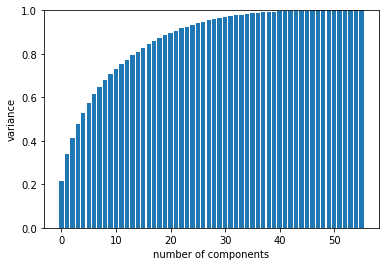

In [44]:
#Plot explained variance per number of leading PC's to choose
eigenvalues = pca.explained_variance_
plt.bar(np.arange(n), eigenvalues.cumsum()/eigenvalues.sum(),align='center');
plt.ylim(0,1)
# plt.xlim(0,n)
plt.xlabel('number of components')
plt.ylabel('variance')

In [45]:
p=0.8
pca = PCA(p)
P = pca.fit_transform(X_train_numeric)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P.shape[1],100*p))

we need 15 PCs to explain 80.00 percent of variance


In [46]:
p=0.9
pca = PCA(p)
P = pca.fit_transform(X_train_numeric)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P.shape[1],100*p))

we need 22 PCs to explain 90.00 percent of variance


In [47]:
p=0.95
pca = PCA(p)
P = pca.fit_transform(X_train_numeric)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P.shape[1],100*p))

we need 28 PCs to explain 95.00 percent of variance


### method 2

In [48]:
p=0.95
pca = PCA(p,whiten=True) #PCA model, paramerized by the target number of components or target percentage of variance

pca.fit(X_train_numeric) #fit the model to the data
eigenvalues = pca.explained_variance_

X_train_numeric = pca.transform(X_train_numeric) #find principal components
n = X_train_numeric.shape[1] # how many eigenvectors we choose

print("we need %d PCs to explain %.2f percent of variance"%(n,100*p))

we need 28 PCs to explain 95.00 percent of variance


In [49]:
pd.DataFrame(X_train_numeric).corr()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.000000e+00,-6.526682e-18,-1.684571e-16,-1.269611e-16,5.200735e-16,-2.445788e-17,7.777057e-17,-1.566404e-17,2.191591e-16,-8.443466e-17,...,-2.231438e-16,1.761689e-16,-3.134182e-16,-5.743480e-17,-5.022110e-17,3.197387e-16,6.526682e-16,-2.413155e-17,1.511442e-17,2.573316e-16
1,-6.526682e-18,1.000000e+00,-2.011592e-15,4.287000e-17,-2.472170e-15,-4.990507e-16,4.616769e-17,3.580744e-16,6.180425e-16,4.314481e-16,...,-1.154192e-17,1.000987e-16,-3.435096e-16,3.781354e-16,-5.468673e-17,-4.583792e-16,-3.716774e-16,3.312978e-16,7.507746e-16,2.277469e-17
2,-1.684571e-16,-2.011592e-15,1.000000e+00,1.494954e-16,-5.276307e-17,-2.418308e-16,8.574000e-17,-7.694615e-17,-1.061582e-15,6.474469e-16,...,7.254923e-17,7.035077e-17,1.593885e-16,6.815230e-17,-6.963627e-16,-1.824723e-16,-5.592336e-16,3.531279e-16,-2.770061e-16,-2.654642e-16
3,-1.269611e-16,4.287000e-17,1.494954e-16,1.000000e+00,1.714800e-16,4.308984e-16,-3.143800e-16,-1.099231e-16,1.593885e-17,2.693115e-16,...,-3.737384e-16,5.971571e-16,7.254923e-16,-8.617969e-16,-1.599381e-16,-1.297092e-16,-5.584092e-16,5.366994e-16,-1.714800e-16,-1.261367e-16
4,5.200735e-16,-2.472170e-15,-5.276307e-17,1.714800e-16,1.000000e+00,3.341661e-16,-7.914461e-17,-1.374038e-16,1.571900e-16,-2.242431e-16,...,7.573700e-16,1.423504e-16,-4.858600e-16,8.024384e-17,-1.335565e-16,-5.496154e-16,4.891577e-17,-2.100561e-16,-2.638154e-16,-8.329421e-16
5,-2.445788e-17,-4.990507e-16,-2.418308e-16,4.308984e-16,3.341661e-16,1.000000e+00,-1.055261e-16,-5.177377e-16,-2.819527e-16,5.726992e-16,...,-7.430800e-16,8.431100e-16,-2.220446e-16,5.199361e-16,1.647747e-15,2.565604e-15,-6.529430e-16,-2.343422e-16,-2.110523e-16,8.038125e-16
6,7.777057e-17,4.616769e-17,8.574000e-17,-3.143800e-16,-7.914461e-17,-1.055261e-16,1.000000e+00,-6.485461e-17,-4.589288e-17,-7.232938e-16,...,-5.397223e-16,1.618617e-16,-3.836315e-16,7.584692e-17,-1.978615e-17,5.694015e-16,-1.582892e-16,1.833654e-16,-4.396923e-16,2.209454e-16
7,-1.566404e-17,3.580744e-16,-7.694615e-17,-1.099231e-16,-1.374038e-16,-5.177377e-16,-6.485461e-17,1.000000e+00,-1.595259e-16,7.024084e-16,...,1.923654e-16,4.851730e-16,-1.423504e-16,1.011292e-16,3.682423e-17,-3.561508e-16,-1.092361e-16,-7.971140e-17,-3.165784e-16,9.484644e-16
8,2.191591e-16,6.180425e-16,-1.061582e-15,1.593885e-17,1.571900e-16,-2.819527e-16,-4.589288e-17,-1.595259e-16,1.000000e+00,7.451410e-16,...,3.028381e-16,4.068871e-16,7.412937e-16,3.984711e-17,1.273047e-16,-8.541023e-16,-5.290048e-17,9.085142e-16,2.836015e-16,1.203005e-15
9,-8.443466e-17,4.314481e-16,6.474469e-16,2.693115e-16,-2.242431e-16,5.726992e-16,-7.232938e-16,7.024084e-16,7.451410e-16,1.000000e+00,...,4.292496e-16,1.308772e-16,5.446688e-16,-4.083642e-16,9.123615e-17,-7.606677e-16,8.339039e-16,-5.411478e-16,1.055261e-16,-6.586110e-16


In [50]:
X_test_numeric = pca.transform(X_test_numeric)  #Don't use fit_transform, just apply the pca we learned before
pd.DataFrame(X_test_numeric).corr()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.000000,0.079196,0.075139,-0.037679,-0.038565,0.035261,0.123297,-0.013752,0.016912,0.122935,...,-0.047551,0.057240,0.014002,-0.038316,0.019041,-0.059769,-0.023473,-0.043911,0.027342,-0.077316
1,0.079196,1.000000,0.041000,-0.050415,-0.157308,0.010409,-0.013201,-0.026804,0.030205,-0.003027,...,0.004861,-0.021497,-0.099235,-0.001151,-0.004937,-0.002703,-0.057417,0.045678,-0.040386,0.009885
2,0.075139,0.041000,1.000000,-0.148329,0.170330,0.078666,0.101916,0.104719,-0.113800,0.049869,...,0.022690,0.072961,0.209318,0.000531,0.144706,0.000447,0.045396,0.040767,-0.095011,-0.029988
3,-0.037679,-0.050415,-0.148329,1.000000,-0.166935,-0.155051,-0.095713,-0.197266,-0.117519,-0.043998,...,0.110305,0.093537,0.208648,0.018241,0.136150,-0.055763,0.066462,0.103384,0.026237,0.074490
4,-0.038565,-0.157308,0.170330,-0.166935,1.000000,0.030648,-0.088442,-0.363296,0.124888,0.059329,...,0.030161,0.002268,-0.007669,-0.067240,-0.034624,0.087711,0.042780,0.038593,-0.097261,-0.082585
5,0.035261,0.010409,0.078666,-0.155051,0.030648,1.000000,0.007684,-0.139240,-0.022324,-0.018011,...,0.132521,0.082137,0.125171,-0.047238,0.101217,0.045188,0.039255,0.064834,-0.149718,0.023400
6,0.123297,-0.013201,0.101916,-0.095713,-0.088442,0.007684,1.000000,-0.415216,-0.009660,0.121239,...,-0.040274,0.000412,0.037798,-0.035803,0.043633,-0.091794,0.014392,0.009347,-0.027585,-0.118663
7,-0.013752,-0.026804,0.104719,-0.197266,-0.363296,-0.139240,-0.415216,1.000000,0.226772,0.179389,...,0.029708,0.093838,0.066671,-0.038855,0.033679,-0.045716,0.040354,-0.105128,0.140123,-0.120756
8,0.016912,0.030205,-0.113800,-0.117519,0.124888,-0.022324,-0.009660,0.226772,1.000000,0.099556,...,0.096502,0.462434,0.223789,0.041625,-0.007441,0.133655,0.117195,0.097347,0.046746,0.133003
9,0.122935,-0.003027,0.049869,-0.043998,0.059329,-0.018011,0.121239,0.179389,0.099556,1.000000,...,-0.022290,-0.140006,-0.101792,-0.040327,-0.070381,0.066547,-0.026758,-0.017283,-0.097208,0.006071


# Modeling